In [23]:
#Dependencies 
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

# Read the crime data
crimefile_path = "datasource/crime_data.csv"
crimefile_df = pd.read_csv(crimefile_path)
crimefile_df.head()

# Function to plot the graph
def plot_line (x_axis, y_axis, def_color="red"):
    plt.plot(x_axis, y_axis, color=def_color)
    plt.grid(True)
    plt.show()
    return

In [2]:
# Removing Federal Data as there are lot of NaN data.
crimefile_df = crimefile_df.loc[crimefile_df["jurisdiction"]!= "FEDERAL",:]
crimefile_df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,NaN,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0


In [3]:
# Only the needed data
df1 = crimefile_df[["jurisdiction", "year","state_population","violent_crime_total"]]
df1["crime_per_pop"] = round((df1["violent_crime_total"] / df1["state_population"])*100,3)

C:\Users\sande\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df = df1.loc[crimefile_df["jurisdiction"]=="ARIZONA",:]
df

,jurisdiction,year,state_population,violent_crime_total,crime_per_pop
3,ARIZONA,2001,5306966.0,28675.0,0.540
54,ARIZONA,2002,5441125.0,30171.0,0.554
105,ARIZONA,2003,5579222.0,28638.0,0.513
156,ARIZONA,2004,5739879.0,28952.0,0.504
207,ARIZONA,2005,5953007.0,30478.0,0.512
258,ARIZONA,2006,6166318.0,33456.0,0.543
309,ARIZONA,2007,6338755.0,32835.0,0.518
360,ARIZONA,2008,6500180.0,31567.0,0.486
411,ARIZONA,2009,6595778.0,28128.0,0.426
462,ARIZONA,2010,6413158.0,26528.0,0.414


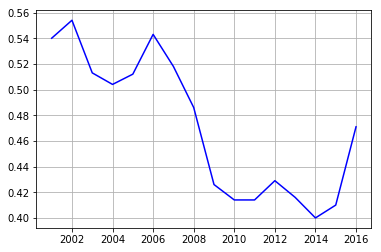

In [26]:
# Plotting the graph
plot_line(df["year"], df["crime_per_pop"], "blue")

In [19]:
df2 = df1[["jurisdiction","crime_per_pop"]]
df3 = df2.groupby("jurisdiction")["crime_per_pop"].mean()
df4 = df3.reset_index()
df5 = df4.sort_values("crime_per_pop")
df5.reset_index(inplace=True)
print(f'States with Lowest crime: {df5.head()}')
print(f'States with Highest crime: {df5.tail()}')

States with Lowest crime:    index   jurisdiction  crime_per_pop
0     18          MAINE       0.118875
1     44        VERMONT       0.125750
2     28  NEW HAMPSHIRE       0.174875
3     33   NORTH DAKOTA       0.192875
4     43           UTAH       0.226625
States with Highest crime:     index    jurisdiction  crime_per_pop
45      1          ALASKA       0.644312
46     30      NEW MEXICO       0.652000
47     27          NEVADA       0.653813
48     39  SOUTH CAROLINA       0.671250
49     41       TENNESSEE       0.676063
